# DataLoaders - Reading, Writing, Saving
## Reading & Saving

In [ ]:
import numpy as np

# npy

tmp_array = np.ones((3,3))
np.save("tmp_array.npy", tmp_array)
read_array = np.load("tmp_array.npy")

tmp_array_pkl = np.array([[0,1],[2,3,4],[5,6,7,8]], dtype=object)
np.save("tmp_array_pkl.npy", tmp_array_pkl, allow_pickle=True)
read_array_pkl = np.load("tmp_array_pkl.npy", allow_pickle=True)

print(read_array)
print(read_array_pkl)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[list([0, 1]) list([2, 3, 4]) list([5, 6, 7, 8])]


In [ ]:
# npz 
np.savez('tmp.npz', tmp_array=tmp_array, tmp_array_pkl=tmp_array_pkl)
npz_data = np.load('tmp.npz', allow_pickle=True, encoding='bytes')
read_array = npz_data['tmp_array']
read_array_pkl = npz_data['tmp_array_pkl']

print(read_array)
print(read_array_pkl)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[list([0, 1]) list([2, 3, 4]) list([5, 6, 7, 8])]


In [ ]:
# csv
import pandas as pd

output = pd.DataFrame()
output['id'] = np.array(range(10))
output['label'] = np.array(range(10,20))
print(output.head())

   id  label
0   0     10
1   1     11
2   2     12
3   3     13
4   4     14


In [ ]:
output.to_csv("submission.csv", index = False)

output_read = pd.read_csv("submission.csv")
print(output_read.head())

   id  label
0   0     10
1   1     11
2   2     12
3   3     13
4   4     14


## Custom Dataset & Dataloader

In [ ]:
xs = list(range(10))
ys = list(range(10,20))
print('xs values: ', xs)
print('ys values: ', ys)

xs values:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ys values:  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
data = list(zip(xs,ys))
data[0] # returns the tuple (x[0], y[0])

(0, 10)

In [ ]:
len(data)

10

In [ ]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, xs, ys):
        self.xs = xs
        self.ys = ys

    def __len__(self):
        return len(self.xs)  #len(self.ys)
    
    def __getitem__(self, i):
        return self.xs[i], self.ys[i]

In [ ]:
dataset = MyDataset(xs, ys)
dataset[0] # returns the tuple (x[2], y[2])

(0, 10)

In [ ]:
from torch.utils.data import DataLoader

for x, y in DataLoader(dataset):
    print(x,y)

tensor([0]) tensor([10])
tensor([1]) tensor([11])
tensor([2]) tensor([12])
tensor([3]) tensor([13])
tensor([4]) tensor([14])
tensor([5]) tensor([15])
tensor([6]) tensor([16])
tensor([7]) tensor([17])
tensor([8]) tensor([18])
tensor([9]) tensor([19])


In [ ]:
for x, y in DataLoader(dataset, batch_size=2):
    print(x,y)

tensor([0, 1]) tensor([10, 11])
tensor([2, 3]) tensor([12, 13])
tensor([4, 5]) tensor([14, 15])
tensor([6, 7]) tensor([16, 17])
tensor([8, 9]) tensor([18, 19])


In [ ]:
# enumerate
for index, (x, y) in enumerate(DataLoader(dataset, batch_size=2, shuffle=True)):
    print("index: ", index, "x,y:", x,y)

index:  0 x,y: tensor([7, 1]) tensor([17, 11])
index:  1 x,y: tensor([5, 4]) tensor([15, 14])
index:  2 x,y: tensor([0, 2]) tensor([10, 12])
index:  3 x,y: tensor([3, 8]) tensor([13, 18])
index:  4 x,y: tensor([6, 9]) tensor([16, 19])


In [ ]:
# Training
train_loader_args = dict(shuffle=True, batch_size=2, num_workers=2, pin_memory=True) 
train_loader = DataLoader(dataset, **train_loader_args)

In [ ]:
# enumerate
for index, (x, y) in enumerate(train_loader):
    print("index: ", index, "x,y:", x,y)

index:  0 x,y: tensor([3, 4]) tensor([13, 14])
index:  1 x,y: tensor([7, 9]) tensor([17, 19])
index:  2 x,y: tensor([1, 2]) tensor([11, 12])
index:  3 x,y: tensor([5, 6]) tensor([15, 16])
index:  4 x,y: tensor([8, 0]) tensor([18, 10])


## Torch Dataset & Dataloader

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# FashionMNIST dataset from TorchVision
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



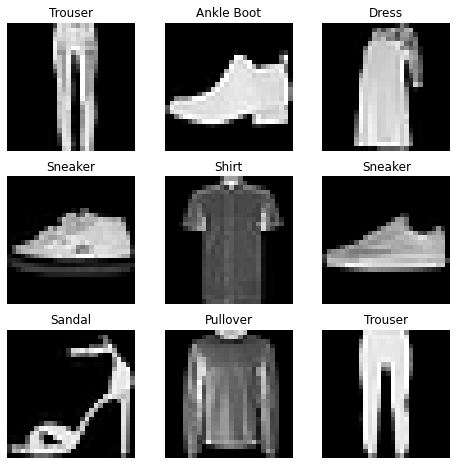

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


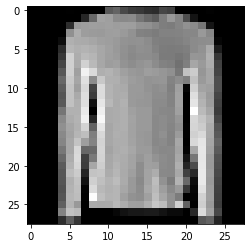

Label: 2


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Custom Image Dataset

In [ ]:
#Save MNIST images in zip and labels in annotations file

train_images_custom = []
train_labels_custom = []
for i in range(10):
  train_images_custom.append(training_data[i][0].numpy())
  train_labels_custom.append(training_data[i][1])

images_npy = np.array(train_images_custom)
np.save("images_npy.npy", images_npy)

labels_npy = np.array(train_labels_custom)
np.save("labels_npy.npy", labels_npy)


In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, images_npy, labels_npy):
        self.imgs = np.load(images_npy)
        self.img_labels = np.load(labels_npy)
        
    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = self.imgs[idx]
        label = self.img_labels[idx]
        return image, label

    def collate_fn(self,batch):
      xs, ys = zip(*batch)

      #For demo - padding border
      xs = [np.pad(x_i, ((0,0),(20, 20), (20, 20)), constant_values=0) for x_i in list(xs) ] 
      return tuple(xs), y


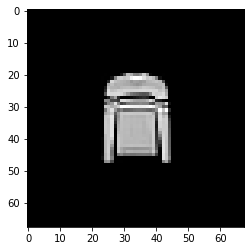

Label: tensor([18, 10])


In [ ]:
train_data_custom = CustomImageDataset("images_npy.npy", "labels_npy.npy")
train_args = dict(batch_size=2, shuffle=True, collate_fn= train_data_custom.collate_fn)
train_dataloader_custom = DataLoader(train_data_custom, **train_args)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader_custom))
img = train_features[0].squeeze()
label = train_labels
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
"""Some references:

    1. Numpy save and load - https://numpy.org/doc/stable/reference/generated/numpy.save.html
                             https://numpy.org/doc/stable/reference/generated/numpy.load.html
                             https://numpy.org/doc/stable/reference/generated/numpy.savez.html#numpy.savez

    2. Pandas read and save csv - https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
                                  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

    2. Pytorch Datasets and Datloader - https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
                                        https://pytorch.org/docs/stable/data.html

"""